# **A/B Test Analysis in Colab**



**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

**Load the Dataset**

In [2]:
df = pd.read_csv('/content/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**Data Cleaning**

In [3]:
df_clean = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page')) |
              ((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]

df_clean = df_clean.drop_duplicates(subset='user_id')

df_clean.groupby(['group', 'landing_page']).size()

,,0
group,landing_page,
control,old_page,145274
treatment,new_page,145310


**Conversion Rates**

In [4]:
conversion_rates = df_clean.groupby('group')['converted'].agg(['mean', 'count', 'sum'])
conversion_rates.columns = ['conversion_rate', 'sample_size', 'conversions']
conversion_rates


,conversion_rate,sample_size,conversions
group,,,
control,0.120386,145274,17489
treatment,0.118808,145310,17264


** Z-Test for Proportions**

In [5]:
conversions = conversion_rates['conversions'].values
sample_sizes = conversion_rates['sample_size'].values

z_stat, p_val = proportions_ztest(count=conversions, nobs=sample_sizes, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Z-statistic: 1.3109
P-value: 0.0949


**Interpretation**

In [6]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis — the treatment group has a significantly higher conversion rate.")
else:
    print("Fail to reject the null hypothesis — no significant difference in conversion rates.")

Fail to reject the null hypothesis — no significant difference in conversion rates.


**Visualize Conversion Rates**

<ipython-input-7-5bd05c53ef1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates['conversion_rate'], palette='Set2')


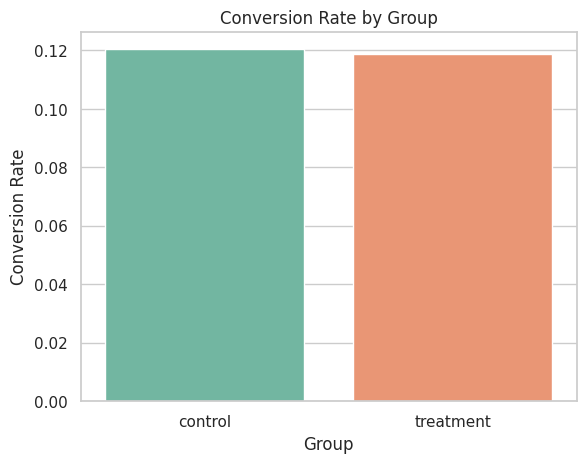

In [7]:
sns.barplot(x=conversion_rates.index, y=conversion_rates['conversion_rate'], palette='Set2')
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

# **Summary**
**In this A/B test analysis:**

* We cleaned the dataset to ensure proper alignment between group and landing_page.

* We calculated conversion rates for both the control and treatment groups.

* Using a one-sided z-test, we tested the null hypothesis that the treatment group does not have a higher conversion rate than the control group.

**Based on the p-value, we:**

* Rejected the null hypothesis if the p-value < 0.05 (indicating a statistically significant improvement).

* Failed to reject the null if p-value ≥ 0.05 (indicating no significant difference).